## Agent-based modeling and simulation of transport flows in Amsterdam
### This notebook handles the preprocessing of GVB data to deduce a population that can be used in an agent-based simulation of public transport in Amsterdam.

#### Load all packages

In [1]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

#### Load data for origin and destination per hour

In [2]:
origin = pd.read_csv('../../Data/20190403/Datalab_Reis_Herkomst_Uur_20190403.csv', sep=';')
origin = origin.dropna()
destination = pd.read_csv('../../Data/20190403/Datalab_Reis_Bestemming_Uur_20190402.csv', sep=';')
destination = destination.dropna()

In [3]:
# List of all stations in the sub-network
stations = ['Amsteldijk','Amstelstation','Amstelveenseweg','Beethovenstraat','Bullewijk','Burg.de Vlugtlaan', 
    'Centraal Station','Cornelis Troostplein','Dam','De Boelelaan/VU','De Pijp','Europaplein',
    'Gaasperplas','Gein','Gerrit v.d. Veenstraat','Heemstedestraat','Henk Sneevlietweg','IJsbaanpad', 
    'Isolatorweg','Jan v.Galenstraat','Keizersgracht','Koningsplein','Kraaienneststation','Leidseplein',
    'Maasstraat','Marie Heinekenplein','Minervaplein','Muntplein','Museumplein','Nieuwezijds Kolk',
    'Nieuwmarkt','Noord','Noorderpark','Olympiaplein','Olympiaweg','Olympisch stadion','Overamstel', 
    'Postjesweg','Prinsengracht','Reigersbos','Rijksmuseum','Roelof Hartplein','Rokin','Scheldestraat',
    'Spaklerweg','Spui','Station Bijlmer ArenA','Station Diemen-Zuid','Station Duivendrecht', 'Stadionweg'
    'Station Ganzenhoef','Station Holendrecht','Station Lelylaan','Station RAI','Station Sloterdijk', 
    'Strandvliet','Van Baerlestraat','Van der Madeweg','Venserpolder','Verrijn Stuartweg','Victorieplein', 
    'Vijzelgracht','VU medisch centrum','Waalstraat','Waterlooplein','Weesperplein','Wibautstraat','Station Zuid']

#### Change dates to datetime objects and add weekday column

In [4]:
origin['Datum'] = origin['Datum'].apply(lambda x: datetime.datetime.strptime(x[:-3], '%m/%d/%Y %H:%M:%S'))
origin['Weekdag'] = origin['Datum'].apply(lambda x: x.isoweekday())

destination['Datum'] = destination['Datum'].apply(lambda x: datetime.datetime.strptime(x[:-3], '%m/%d/%Y %H:%M:%S'))
destination['Weekdag'] = destination['Datum'].apply(lambda x: x.isoweekday())

KeyboardInterrupt: 

#### Remove data where the Noord/Zuid line did not run yet
The Noord/Zuid line was opened on the 21st of July, so all data before August is not used.

In [ ]:
origin = origin[origin['Datum'] >= datetime.datetime(2018, 8, 1)]
destination = destination[destination['Datum'] >= datetime.datetime(2018, 8, 1)]

#### Apply necessary filters for analysis
The first analysis is only applied on one type of day (1 = Mondays) and for the stations that are included in the sub-network.

In [ ]:
origin = origin[(origin['VertrekHalteNaam'].isin(stations)) & (origin['Weekdag'] == 1)]
destination = destination[(destination['AankomstHalteNaam'].isin(stations)) & (destination['Weekdag'] == 1)]

#### Remove 'HalteCodes' that are not used in the sub-network

In [57]:
# Lijst maken van haltecodes die ik gebruik
# Deze haltecodes verwijderen uit de data
# Voor haltes die ik gebruik, aantal lijnen dat ik niet gebruik proportioneel weghalen

In [58]:
stops = set(origin['VertrekHalteNaam'].tolist() + destination['AankomstHalteNaam'].tolist())
stopdict = {}
for stop in stops:
    stopcodes = list(set(origin[origin['VertrekHalteNaam'] == stop]['VertrekHalteCode'].tolist() 
                         + destination[destination['AankomstHalteNaam'] == stop]['AankomstHalteCode'].tolist()))
    stopdict[stop] = stopcodes
    
stops

{'Isolatorweg': ['ITW'],
 'Gein': ['GN'],
 'Olympiaweg': ['07120', '07108'],
 'Prinsengracht': ['06072', '08062', '08063', '06071'],
 'Station RAI': ['07261', '07260', 'RAI'],
 'Verrijn Stuartweg': ['VSW'],
 'Noord': ['ND'],
 'Waalstraat': ['09182', '09554', '09060', '09083', '09063', '09061', '09082'],
 'Rokin': ['RKN', '05036', '05035'],
 'Maasstraat': ['09077',
  '09069',
  '09161',
  '09057',
  '09084',
  '09078',
  '09068',
  '09079',
  '09160'],
 'Beethovenstraat': ['07307', '07308'],
 'Koningsplein': ['06075', '06076'],
 'Weesperplein': ['08174', '08053', '08054', 'WPP'],
 'Keizersgracht': ['06073', '06074', '08060', '08061'],
 'Muntplein': ['08071', '08070'],
 'Gerrit v.d. Veenstraat': ['07084', '07083'],
 'IJsbaanpad': ['07207', '07205'],
 'Marie Heinekenplein': ['09122', '09121'],
 'Olympisch stadion': ['07202', '07121'],
 'Reigersbos': ['RGB'],
 'Henk Sneevlietweg': ['HVW'],
 'Overamstel': ['OAS'],
 'Station Lelylaan': ['CLL', '04196', '04124', '04147', '04195', '04123'],
 '

In [59]:
stop = [(['ITW', 'GN', 'RAI', 'VSW', 'ND', 'RKN', 'WPP', 'RGB', 'HVW', 
        'OAS', 'CLL', 'PJW', 'BLW', 'WBS', 'HLD', 'MDW', 'SVT', 'DMZ', 
        'BMR', 'EPP', 'WTC', 'DPP','JLS',  'DVD', 'GZH', 'NDP', 'NMT', 
        'VLN', 'ASA', 'KEN', 'VPD', 'SLW', 'WLP', 'HDS', 'GPP', 'VZG', 
        'CS', 'VU', 'ASW', 'STD', '08070', '09122', '09121', '07094', 
        '07091', '08071', '09013','07004', '08076', '08078',], 1),
        (['07120', '07108', '09083', '09082', '07202', '07121',
        '09078','09079', '07084', '07083', '07207', '07205', '07202', 
        '07121', '07017', '07303', '07350', '09074', '09075', '07098', 
        '07097', '07493', '07490', '09119', '09120', '07087', '07308'], 2),
        (['05036', '05035', '06072', '06071', '06075', '06076',
        '06073', '06074', '07015', '09049', '09051', '05062', '05061',
        '07006', '07007', '07322', '07321', '07323', '07324', '06067',
        '05063', '05032', '05031'], 3)
        (['07016', '09114', '09111',], float(2/3)),
        (['09139', '09140', '05022'], 4),
        (['05011', '06089', '05065', '05070', '05069'], 5)]

TypeError: 'tuple' object is not callable

#### Group by hour for further analysis

In [7]:
origingrouped = origin[['UurgroepOmschrijving (van vertrek)','VertrekHalteNaam', 'AantalReizen']]
origingrouped = origingrouped.groupby(['UurgroepOmschrijving (van vertrek)', 
                                'VertrekHalteNaam']).aggregate(['min', np.median, np.sum, max])
origingrouped['AantalReizen','mean'] = origingrouped['AantalReizen']['sum'].apply(lambda x: float(x/34))
origingrouped = origingrouped.reset_index()
origingrouped.columns = ['hour', 'stop', 'min', 'median', 'sum', 'max', 'mean']

In [8]:
destinationgrouped = destination[['UurgroepOmschrijving (van aankomst)','AankomstHalteNaam', 'AantalReizen']]
destinationgrouped = destinationgrouped.groupby(['UurgroepOmschrijving (van aankomst)', 
                                'AankomstHalteNaam']).aggregate(['min', np.median, np.sum, max])
destinationgrouped['AantalReizen','mean'] = destinationgrouped['AantalReizen']['sum'].apply(lambda x: float(x/34))
destinationgrouped = destinationgrouped.reset_index()
destinationgrouped.columns = ['hour', 'stop', 'min', 'median', 'sum', 'max', 'mean']

#### Create plot of distribution for a certain hour

In [9]:
def plotgroup(hour, dataframe):
    dataframe = dataframe[dataframe['hour'] == hour]
    total = dataframe['sum'].sum()
    dataframe['percentage'] = dataframe['sum'].apply(lambda x: (x / total) * 100)
    dataframe = (dataframe.sort_values(by = 'percentage', ascending = False)).head(10)
    return dataframe.plot(kind = 'barh', x = 'stop', y = 'percentage', figsize = [10,5])

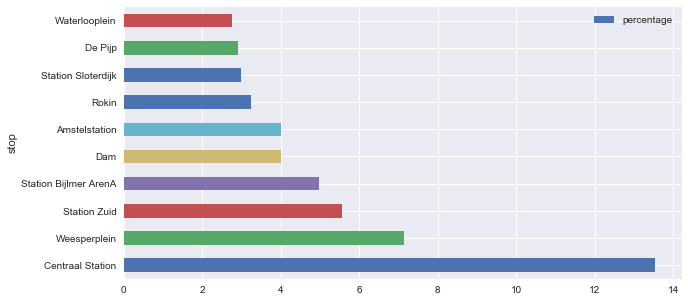

In [10]:
plotgroup('15:00 - 15:59', origingrouped)

#### Save distribution for simulation

In [11]:
origingrouped.to_csv('../Data/origin.csv', index=False)
destinationgrouped.to_csv('../Data/destination.csv', index=False)